<center> <font size = 7 color = 'steelblue'> <b> Temporal Difference Learning in RL

<div class="alert alert-block alert-info"> 
<font size = 4>
    
- This notebook provides a hands-on experience with the basic concept of Temporal Difference (TD) Learning, specifically TD(0). 
- OpenAI Gym's FrozenLake environment is used to demonstrate how an agent can learn from the environment using the TD method.

In [1]:
# Import necessary libraries
import numpy as np
import gym
import matplotlib.pyplot as plt

<font size = 6 color = 'midnightblue'> <b>   Setting Up the FrozenLake Environment

<div class="alert alert-block alert-success"> 
<font size = 4>
    
- Use the **FrozenLake-v0** environment to demonstrate TD learning.
- The goal in this environment is to navigate a frozen lake from a starting point (top left corner) to the goal (bottom right corner) without falling into holes.
- The surface is slippery, so the agent doesn't always move in the direction it intends.

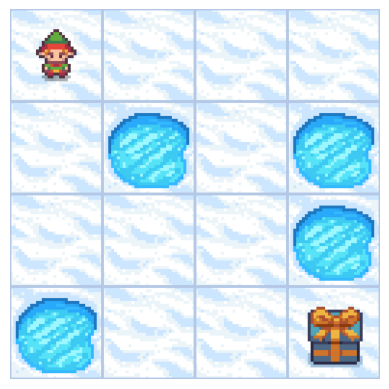

In [4]:
# Initialize the FrozenLake environment
env = gym.make('FrozenLake-v1')

env.reset()
# Render the environment in 'rgb_array' mode
img = env.render(mode='rgb_array')

# Display the image
plt.imshow(img)
plt.axis('off')  # turn off the axis for aesthetics
plt.show()

# Close the environment
env.close()

<font size = 6 color = 'midnightblue'> <b>   Understanding Temporal Difference (TD) Learning

<div class="alert alert-block alert-success"> 
<font size = 4>
    
- Temporal Difference Learning is a combination of Monte Carlo ideas and dynamic programming (DP) ideas. 
- **TD(0), or one-step TD**, updates the value of states based on the estimated return after taking one action and observing the immediate reward and the value of the resulting state.


<font size = 6 color = 'midnightblue'> <b>  Implementing TD Learning Algorithm

<div class="alert alert-block alert-success"> 
<font size = 4>
    
- Implement the TD(0) algorithm to estimate the value function of the policy that moves randomly in all directions. 
- The environment is stochastic, and the agent only learns from the sample of its experience.


In [5]:
# Define the TD(0) algorithm
def td_zero(env, num_episodes, alpha, gamma):
    # Initialize state value function arbitrarily for all states except terminal states (set to 0)
    V = np.zeros(env.observation_space.n)
    
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        
        while not done:
            action = env.action_space.sample()  # Agent takes action randomly (exploratory policy)
            next_state, reward, done, info = env.step(action)
            
            # TD Update
            V[state] = V[state] + alpha * (reward + gamma * V[next_state] - V[state])
            state = next_state
            
    return V

<font size = 6 color = 'midnightblue'> <b>  Running the TD(0) Algorithm

<div class="alert alert-block alert-success"> 
<font size = 4>
    
- Now run our TD(0) algorithm over 1000 episodes to learn the value of each state under a random policy. 
- Set the learning rate `alpha` to 0.01 and the discount factor `gamma` to 0.9.

In [6]:
# Set parameters for TD(0)
alpha = 0.01
gamma = 0.9
num_episodes = 1000

# Run TD(0)
V = td_zero(env, num_episodes, alpha, gamma)

/opt/anaconda3/envs/rl/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


<font size = 6 color = 'midnightblue'> <b> Visualizing the Results

<div class="alert alert-block alert-success"> 
<font size = 4>
    
- Let's visualize the value function learned by the agent after it has gone through the episodes. 
- This will give an insight into what the agent has learned about the environment.


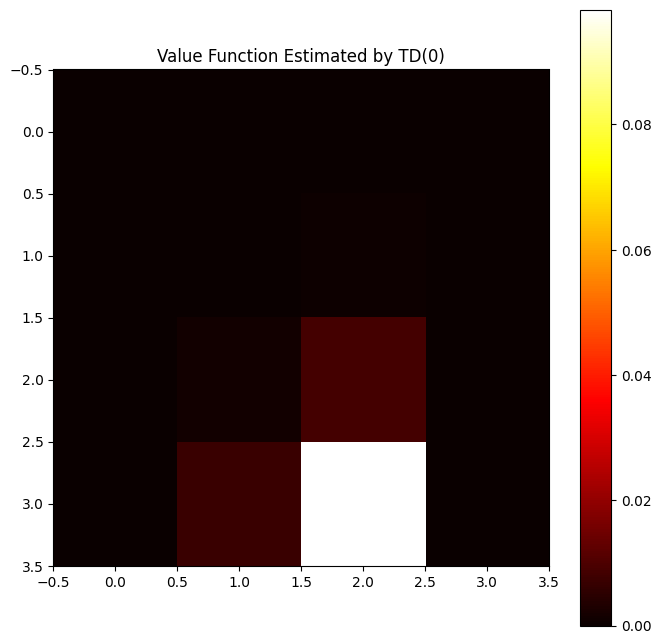

In [7]:
# Plotting the value function
plt.figure(figsize=(8,8))
plt.imshow(V.reshape(4,4), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Value Function Estimated by TD(0)")
plt.show()


<font size = 6 color = 'midnightblue'> <b>Heatmap Explanation

<div class="alert alert-block alert-success"> 
<font size = 4>
    
**What it represents:**
    
- The heatmap displays the value function learned after running the TD(0) algorithm. 
- The value function, **V(s)**, estimates the long-term reward for each state **s**, giving insight into which positions on the lake are more valuable for reaching the goal.

**Color Coding:**

- The colors in the heatmap correspond to the values of each state in the grid. 
- Typically, warmer colors (like red) indicate higher values, and cooler colors represent lower values. 
- In the context of the FrozenLake environment, higher values suggest better states that are more likely to lead to the goal under the given policy.

<font size = 6 color = 'midnightblue'> <b> Conclusion

<div class="alert alert-block alert-info"> 
<font size = 4> 
    
- In this notebook, we've seen how TD(0), a basic form of **Temporal Difference Learning**, can be implemented and used to estimate the value function of a given policy in a stochastic environment.
- The learned values represent the long-term benefit of being in each state under the policy followed (random actions in this case).
- This forms a fundamental part of learning and decision-making in more complex reinforcement learning algorithms.
